Welcome to the "Emotions" dataset – a collection of English Twitter messages meticulously annotated with six fundamental emotions: anger, fear, joy, love, sadness, and surprise. This dataset serves as a valuable resource for understanding and analyzing the diverse spectrum of emotions expressed in short-form text on social media.

Six categories:

* Anger (0)
* Fear (1)
* Happy (2)
* Love (3)
* Sad (4)
* Surprise (5).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Emotion_final.csv')
df

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


In [3]:
df.head(10)

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sadness
6,ive been taking or milligrams or times recomme...,surprise
7,i feel as confused about life as a teenager or...,fear
8,i have been with petronas for years i feel tha...,happy
9,i feel romantic too,love


In [4]:
df.tail()

,Text,Emotion
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear
21458,"I am dismayed , but not surpris",fear


In [5]:
df.shape

(21459, 2)

In [6]:
df.size

42918

In [7]:
df.columns

Index(['Text', 'Emotion'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


In [9]:
df['Emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'happy'],
      dtype=object)

In [10]:
df['Emotion'].value_counts()

Emotion
happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: count, dtype: int64

In [11]:
df.isna().sum()

Text       0
Emotion    0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

l1=le.fit(df['Emotion'])
df['Emotion']=l1.transform(df['Emotion'])

In [13]:
df.head(10)

,Text,Emotion
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0
5,ive been feeling a little burdened lately wasn...,4
6,ive been taking or milligrams or times recomme...,5
7,i feel as confused about life as a teenager or...,1
8,i have been with petronas for years i feel tha...,2
9,i feel romantic too,3


In [14]:
features=df['Text']
target=df['Emotion']

In [15]:
features

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
21454                 Melissa stared at her friend in dism
21455    Successive state elections have seen the gover...
21456                 Vincent was irritated but not dismay
21457    Kendall-Hume turned back to face the dismayed ...
21458                      I am dismayed , but not surpris
Name: Text, Length: 21459, dtype: object

In [17]:
target

0        4
1        4
2        0
3        3
4        0
        ..
21454    1
21455    1
21456    1
21457    1
21458    1
Name: Emotion, Length: 21459, dtype: int32

In [28]:
from tensorflow.keras.utils import to_categorical

targets=to_categorical(target)
print(targets)

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]


In [29]:
# splitting for training and testing

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,targets,test_size=0.20,random_state=4)

In [35]:
xtrain

11433    im feeling so lousy they tried to cheer me up ...
2720     i inquire incheswhyinches are people relocatin...
841      i have switched songs as that one was beginnin...
2597     i came home one day and discovered that my sis...
4537     i trust he has a plan and if i stay true to an...
                               ...                        
16840    i then realized that if i want to shoot weddin...
11863    i came away feeling a bit sympathetic for her ...
17093    i reread for comfort the familiarity of a book...
8366     i am feeling quite smug now as i didn t actual...
17530    i feel furious at love because i really though...
Name: Text, Length: 17167, dtype: object

In [36]:
xtest

10513                  ive been feeling very very restless
4723     i ask him if he is feeling adventurous and wan...
19586    i am less in shock and currently feeling insul...
8637             when i got my bsc degree with first class
11952    i remember two specific things from that class...
                               ...                        
2994     i think she apologizes for a little too much s...
11691    i go through the cycle again and again attendi...
13332    i am feeling hostile enough that i even hate j...
9407     im not feeling too inspired as it hasnt stoppe...
7091     i feel like since i missed out on so much scho...
Name: Text, Length: 4292, dtype: object

In [37]:
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [38]:
import re
from tensorflow.keras.preprocessing.text import Tokenizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [39]:
def norm(data):
    stop=set(stopwords.words('english'))
    cleaned=[]
    for i in data:

        #lowercasing
        i=i.lower()    

        #here url is not relevenant so repacing urls with whitespaces
        i=re.sub('https?://\\S+|www\\.\\S+','',i)

        #replaces any non-word character(digits,underscore etc) with a space
        i=re.sub('\\W',' ',i)

        #removes newline characters if there are any.
        i=re.sub('\n','',i)

        #replaces multiple spaces with a single space
        i=re.sub(' +',' ',i)
        
        #remove leading and trailing spaces.
        i=re.sub('^ ','',i)
        i=re.sub(' $','',i)
        
        #removing stopwords
        i = ' '.join([word for word in i.split() if word not in stop])

        cleaned.append(i)

    return cleaned

xtrain=norm(xtrain)
xtest=norm(xtest)    

not applying stemming because it is not good for this dataset as this dataset is all about emotion recognition 

not applying lemmatization also because this dataset is a largedataset. so applying lemmetization might effect processing speed

In [41]:
xtrain

['im feeling lousy tried cheer school time choir practice',
 'inquire incheswhyinches people relocating droves feel security precious metal',
 'switched songs one beginning make feel little melancholy fuck needs',
 'came home one day discovered sister borrowed car gotten accident entire front bumper destroyed',
 'trust plan stay true listen promptings heart feel assured everything okay worked plan',
 'feeling grouchy old man mentioned retail therapy great',
 'feel like valentines day confessing romantic love said jin hee oh office worker shopping lotte department store',
 'feel special many people prayed hard',
 'harry going make miserable beyond measure go like thi',
 'love reading feel positively rich house full new books learning new things pain relentless really pace spend days pottering job job depending stupid feel like',
 'im sure anyone else like especially im feeling low dont particularly want wear vintage clothing',
 'feel awful reading someones emotional posts especially min

In [42]:
max_vocab=10000
token=Tokenizer(num_words=max_vocab)
token.fit_on_texts(xtrain)

In [43]:
#convert text data (xtrain and xtest) into sequences of integers.

xtrain=token.texts_to_sequences(xtrain)
xtest=token.texts_to_sequences(xtest)

In [44]:
xtrain

[[4, 2, 604, 509, 1871, 155, 7, 2794, 1179],
 [7995, 7996, 10, 7997, 7998, 1, 1992, 413, 4362],
 [4363, 938, 12, 849, 19, 1, 9, 469, 1077, 586],
 [212, 70, 12, 29, 1517, 850, 7999, 645, 907, 1518, 1110, 470, 8000, 2795],
 [519, 646, 510, 565, 595, 8001, 121, 1, 471, 82, 888, 714, 646],
 [2, 965, 145, 189, 1519, 5593, 1872, 158],
 [1,
  3,
  5594,
  29,
  8002,
  587,
  23,
  67,
  8003,
  8004,
  596,
  873,
  2796,
  1215,
  8005,
  2509,
  1873],
 [1, 238, 55, 10, 2797, 146],
 [2307, 26, 19, 261, 851, 2148, 31, 3, 4364],
 [23,
  287,
  1,
  2798,
  402,
  230,
  345,
  78,
  520,
  684,
  78,
  25,
  147,
  5595,
  5,
  1366,
  658,
  64,
  8006,
  220,
  220,
  2799,
  214,
  1,
  3],
 [4, 62, 173, 190, 3, 176, 4, 2, 234, 27, 248, 13, 434, 2510, 1770],
 [1, 354, 287, 2149, 256, 1078, 176, 566],
 [2, 552, 472, 1269, 152, 5596],
 [4, 2, 92, 329, 472],
 [1, 26, 5597, 8007, 4365, 17, 330, 1874, 8008, 1079, 35, 25, 1080],
 [1, 3, 16, 335, 46, 81, 208, 1143, 534, 1111, 18, 2150],
 [15, 1,

In [45]:
#to ensure they all have the same length. therfore padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

xtrain=tf.keras.preprocessing.sequence.pad_sequences(xtrain,padding='post',maxlen=256)
xtest=tf.keras.preprocessing.sequence.pad_sequences(xtest,padding='post',maxlen=256)

In [46]:
xtrain

array([[   4,    2,  604, ...,    0,    0,    0],
       [7995, 7996,   10, ...,    0,    0,    0],
       [4363,  938,   12, ...,    0,    0,    0],
       ...,
       [3893,  968, 5394, ...,    0,    0,    0],
       [   2,   58,  622, ...,    0,    0,    0],
       [   1,  902,   23, ...,    0,    0,    0]])

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab, 128),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')  # Updated output layer
])

In [48]:
max_sequence_length=100
model.build(input_shape=(None,max_sequence_length))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 100, 128)            │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 32)                  │          18,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,399,878 (5.34 MB)

 Trainable params: 1,399,878 (5.34 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

In [50]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(xtrain, ytrain, epochs=5, validation_split=0.1, batch_size=30, shuffle=True)

Epoch 1/5
515/515 ━━━━━━━━━━━━━━━━━━━━ 172s 311ms/step - accuracy: 0.3737 - loss: 1.5302 - val_accuracy: 0.8026 - val_loss: 0.5989
Epoch 2/5
515/515 ━━━━━━━━━━━━━━━━━━━━ 102s 197ms/step - accuracy: 0.8393 - loss: 0.4924 - val_accuracy: 0.8765 - val_loss: 0.3587
Epoch 3/5
515/515 ━━━━━━━━━━━━━━━━━━━━ 92s 178ms/step - accuracy: 0.9224 - loss: 0.2218 - val_accuracy: 0.8917 - val_loss: 0.3196
Epoch 4/5
515/515 ━━━━━━━━━━━━━━━━━━━━ 95s 184ms/step - accuracy: 0.9540 - loss: 0.1376 - val_accuracy: 0.9010 - val_loss: 0.3681
Epoch 5/5
515/515 ━━━━━━━━━━━━━━━━━━━━ 92s 178ms/step - accuracy: 0.9720 - loss: 0.0989 - val_accuracy: 0.9016 - val_loss: 0.3808


In [51]:
model.evaluate(xtest,ytest)

135/135 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.9033 - loss: 0.3835


[0.37036484479904175, 0.9056383967399597]

In [52]:
testloss,test_acc=model.evaluate(xtest,ytest)
print(f'test accuracy:{test_acc:4f}')

135/135 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.9033 - loss: 0.3835
test accuracy:0.905638


In [53]:
print(f'testloss: {testloss:4f}')

testloss: 0.370365


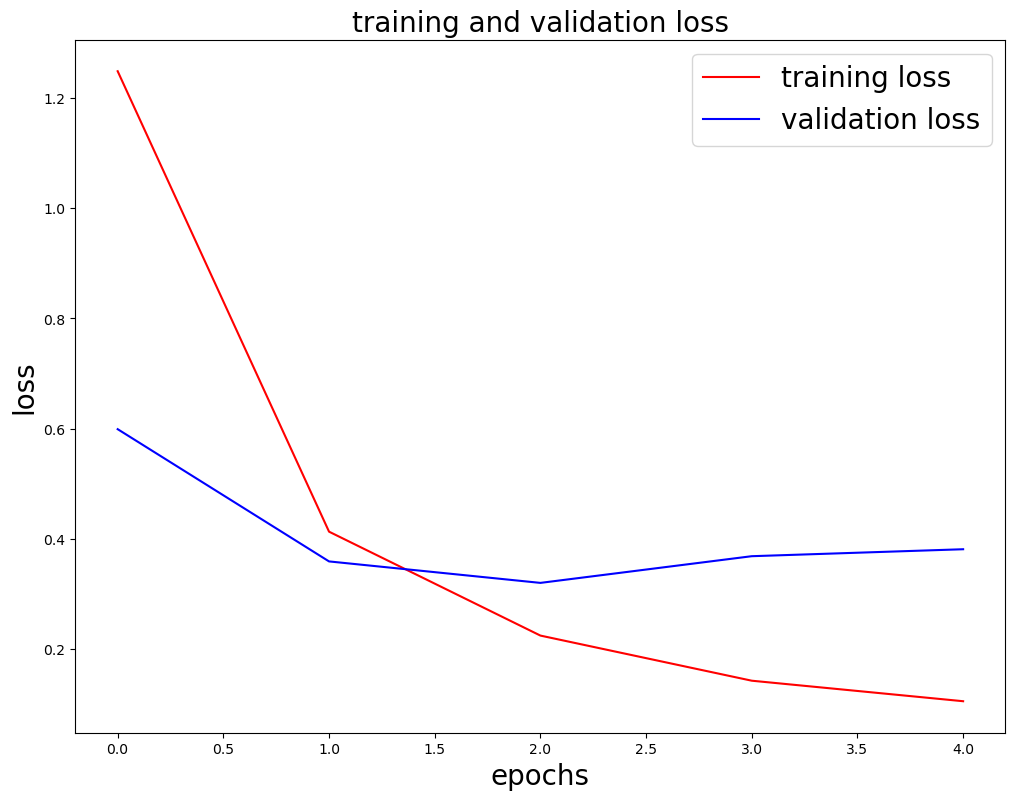

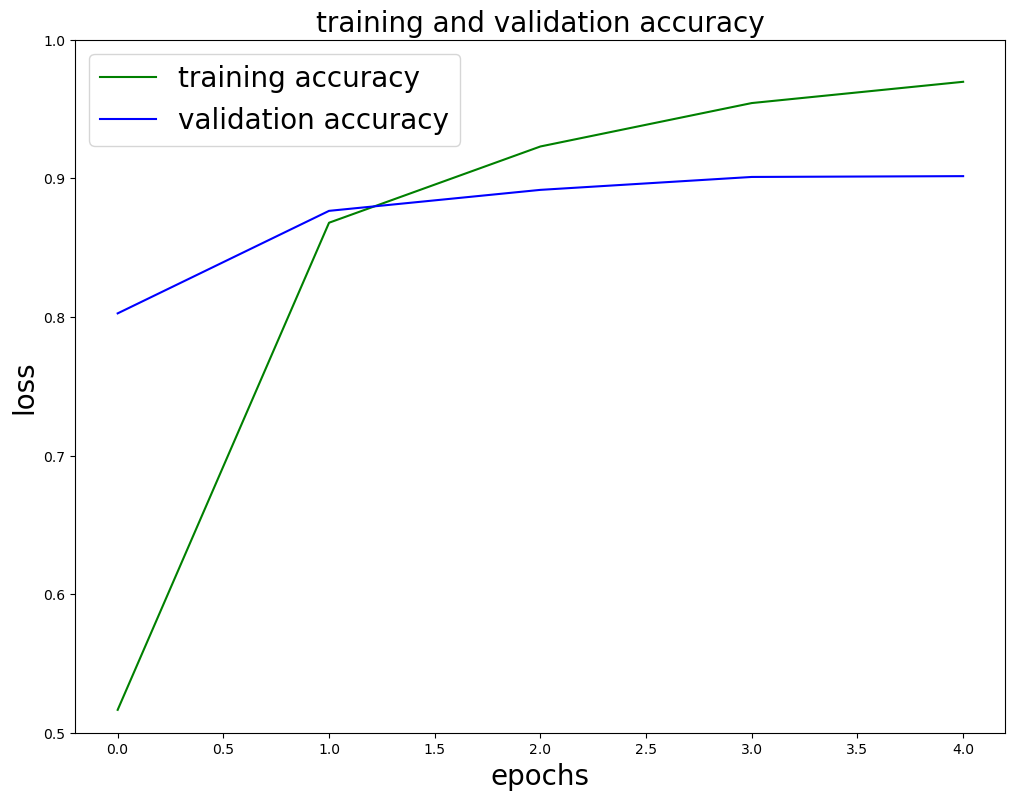

In [54]:

history_dict=history.history
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']
epochs=history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs,loss,'r',label='training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('training and validation loss',size=20)
plt.xlabel('epochs',size=20)
plt.ylabel('loss',size=20)
plt.legend(prop={'size':20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs,acc,'g',label='training accuracy')
plt.plot(epochs,val_acc,'b',label='validation accuracy')
plt.title('training and validation accuracy',size=20)
plt.xlabel('epochs',size=20)
plt.ylabel('loss',size=20)
plt.legend(prop={'size':20})
plt.ylim(0.5,1)
plt.show()

In [56]:
ytest

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [57]:
xtest

array([[  16,    2,  638, ...,    0,    0,    0],
       [ 378,    2,  767, ...,    0,    0,    0],
       [  57, 2079, 1254, ...,    0,    0,    0],
       ...,
       [   2,  942,   56, ...,    0,    0,    0],
       [   4,    2,  327, ...,    0,    0,    0],
       [   1,    3,  104, ...,    0,    0,    0]])

In [58]:
# model.save('emotionmodel1.h5')

In [64]:
pred = model.predict(xtest)
multi_class_predictions = []

for i in pred:
    # Get the index of the highest probability in each prediction (assuming a softmax output)
    category = np.argmax(i)
    multi_class_predictions.append(category)


135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step


In [65]:
multi_class_predictions

[1,
 2,
 0,
 2,
 1,
 0,
 0,
 4,
 4,
 1,
 1,
 1,
 2,
 0,
 2,
 2,
 2,
 4,
 4,
 3,
 2,
 5,
 0,
 0,
 0,
 5,
 2,
 4,
 4,
 1,
 0,
 2,
 5,
 5,
 4,
 2,
 0,
 2,
 2,
 2,
 4,
 4,
 2,
 5,
 4,
 4,
 4,
 1,
 2,
 4,
 2,
 1,
 0,
 2,
 0,
 4,
 4,
 3,
 0,
 0,
 4,
 2,
 0,
 1,
 4,
 3,
 0,
 2,
 0,
 1,
 3,
 1,
 4,
 2,
 2,
 0,
 2,
 2,
 4,
 1,
 4,
 4,
 4,
 0,
 2,
 4,
 0,
 4,
 2,
 0,
 4,
 4,
 1,
 2,
 1,
 0,
 2,
 4,
 4,
 2,
 4,
 4,
 0,
 1,
 2,
 1,
 1,
 4,
 3,
 2,
 4,
 4,
 1,
 2,
 3,
 1,
 2,
 2,
 5,
 3,
 0,
 0,
 4,
 2,
 4,
 2,
 4,
 4,
 0,
 2,
 4,
 4,
 2,
 2,
 4,
 2,
 4,
 4,
 4,
 2,
 1,
 4,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 2,
 1,
 1,
 2,
 2,
 0,
 4,
 5,
 0,
 0,
 2,
 2,
 4,
 4,
 2,
 4,
 4,
 2,
 0,
 3,
 4,
 4,
 2,
 1,
 0,
 4,
 4,
 3,
 2,
 4,
 2,
 3,
 2,
 2,
 0,
 4,
 4,
 4,
 2,
 2,
 4,
 1,
 1,
 4,
 1,
 1,
 4,
 4,
 3,
 2,
 1,
 2,
 4,
 1,
 4,
 2,
 2,
 3,
 3,
 2,
 4,
 2,
 4,
 4,
 0,
 0,
 5,
 0,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 3,
 4,
 2,
 1,
 2,
 0,
 2,
 4,
 4,
 2,
 4,
 2,
 2,
 0,
 2,
 2,
 0,
 4,
 4,
 2,
 2,
 0,
 4,
 4,
 1,


In [67]:
import numpy as np
ytest_single_label = np.argmax(ytest, axis=1)

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Accuracy on testing set:', accuracy_score(ytest_single_label, multi_class_predictions))
print('Precision on testing set:', precision_score(ytest_single_label, multi_class_predictions, average='macro'))
print('Recall on testing set:', recall_score(ytest_single_label, multi_class_predictions, average='macro'))


Accuracy on testing set: 0.9056383970177073
Precision on testing set: 0.8629513384961669
Recall on testing set: 0.8708565277301269


In [69]:
predicts=['i didnt feel humiliated']

In [72]:
predicts=norm(predicts)

In [74]:
predicts=token.texts_to_sequences(predicts)

In [77]:
predicts=tf.keras.preprocessing.sequence.pad_sequences(predicts,padding='post',maxlen=256)

In [81]:
print(predicts)

[[ 60   1 624   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 

In [84]:
pred=model.predict(predicts)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


In [85]:
pred

array([[8.5499960e-05, 8.6670480e-05, 6.7362453e-05, 2.0767227e-06,
        9.9975699e-01, 1.5197716e-06]], dtype=float32)

In [86]:
import numpy as np

# Assuming `pred` is the output of model.predict(xtest)
# Each row in `pred` contains probabilities for the six categories

multi_class_predictions = np.argmax(pred, axis=1)

In [87]:
multi_class_predictions

array([4], dtype=int64)